Importing TensorFlow library

In [1]:
import tensorflow as tf

tf.__version__

'2.9.1'

Loading Dataset(mnist) which is a set of handwritten numeric(0-9) images with 28x28 pixels

In [12]:
mnist = tf.keras.datasets.mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

Training and Testing components (X and y) are multidimensional array each index contain one image of single digit number

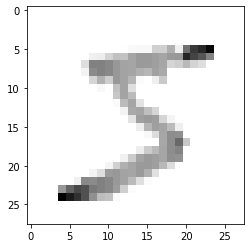

In [15]:
#print(X_train[0])
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[0],cmap=plt.cm.binary)

Defining the neural network model 

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2568 - accuracy: 0.9250
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1039 - accuracy: 0.9676
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0697 - accuracy: 0.9781


Checking for overfitting of the model(one should always aim to build a generalized model that performs well in both training and testing phase)

In [18]:
val_loss, val_accuracy = model.evaluate(X_test,y_test)
print(val_loss,val_accuracy)

313/313 [==============================] - 11s 3ms/step - loss: 0.0876 - accuracy: 0.9724
0.08760085701942444 0.9724000096321106


In [20]:
predictions = model.predict([X_test])
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[1.89577221e-09 1.52611833e-07 4.62302387e-06 ... 9.99841213e-01
  5.37437984e-07 8.81406686e-06]
 [1.48947166e-09 9.18485021e-05 9.99897003e-01 ... 5.21775845e-10
  5.19001127e-08 3.79638866e-13]
 [1.07845301e-06 9.99482870e-01 3.39368620e-04 ... 3.49632282e-05
  3.36877129e-05 1.00949228e-06]
 ...
 [1.86355891e-08 8.54864624e-08 4.21902172e-07 ... 3.26727313e-05
  2.64145456e-06 9.14707198e-05]
 [7.58421876e-08 1.85464160e-07 1.13635870e-07 ... 4.34414346e-07
  1.69415504e-03 3.66458650e-08]
 [1.44938695e-05 5.34606714e-09 2.45149625e-08 ... 3.62111625e-11
  4.75811355e-08 2.72080802e-09]]


Numpy is used for the better understanding of outcome of the model. Prediction gives an output of array each number represting 
the probability of occurance of a particular hand-written digit

In [22]:
import numpy as np

model_out = np.argmax(predictions[0])
print(model_out)

7


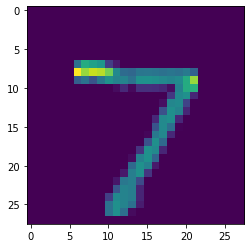

In [23]:
#Validation with the original

plt.imshow(X_test[0])
plt.show()

In [24]:
print(np.argmax(predictions[3]))

0


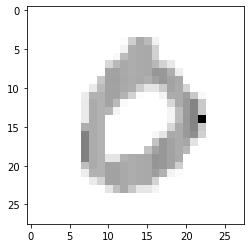

In [26]:
plt.imshow(X_test[3],cmap=plt.cm.binary)
plt.show()

Saving the model for future use.

In [27]:
model.save("test_number_reader.model")

INFO:tensorflow:Assets written to: test_number_reader.model\assets
